In [1]:
import pandas as pd;
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
file_data = pd.read_csv('milkquality.csv')
file_data.info()
file_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


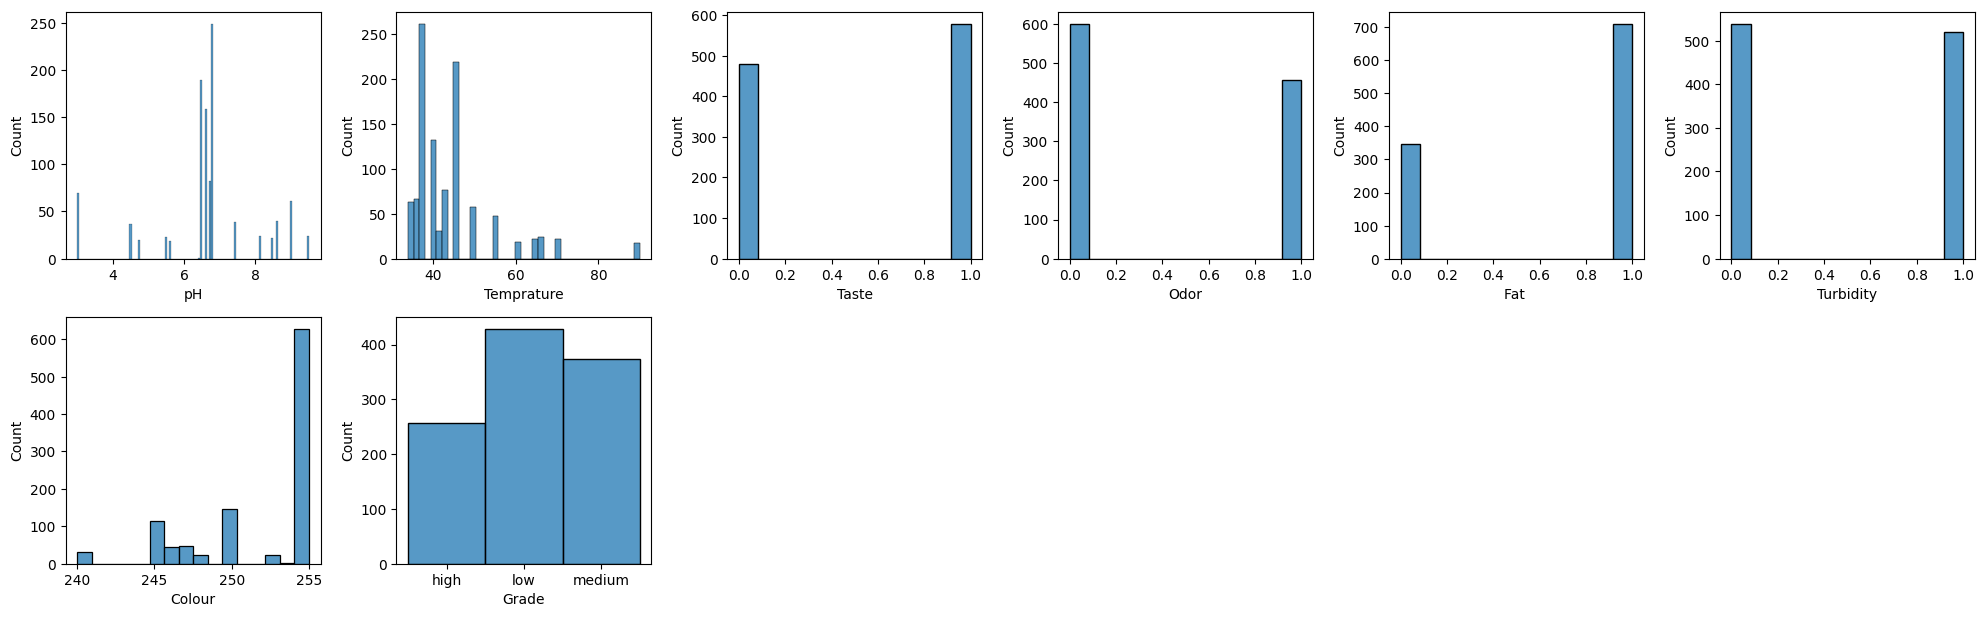

In [3]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in file_data:
    if plotnumber <= 23:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(file_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in file_data.columns:
    file_data[column] = le.fit_transform(file_data[column])

file_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,7,1,1,0,1,0,7,0
1,7,2,0,1,0,1,6,0
2,12,15,1,1,1,1,2,1
3,15,0,1,1,0,1,8,1
4,7,3,0,0,0,0,8,2


In [6]:
x = file_data.drop(["Grade"], axis = 1)
y = file_data['Grade']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print("Train dataset shape: ", x_train.shape )
print("Test dataset shape: ", x_test.shape )

Train dataset shape:  (847, 7)
Test dataset shape:  (212, 7)


In [13]:
from sklearn.tree import DecisionTreeClassifier

dtScores = []

for i in range(1, 11):
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    dt.fit(x_train, y_train)
    dtScores.append(dt.score(x_test, y_test))

print(dtScores)

[0.5518867924528302, 0.7264150943396226, 0.7877358490566038, 0.8726415094339622, 0.910377358490566, 0.9198113207547169, 0.9811320754716981, 0.9811320754716981, 0.9858490566037735, 1.0]


[Text(0.3898809523809524, 0.9545454545454546, 'x[0] <= 9.5\nentropy = 1.559\nsamples = 847\nvalue = [212, 337, 298]'),
 Text(0.34226190476190477, 0.8636363636363636, 'x[0] <= 4.5\nentropy = 1.544\nsamples = 678\nvalue = [212, 168, 298]'),
 Text(0.29464285714285715, 0.7727272727272727, 'entropy = 0.0\nsamples = 132\nvalue = [0, 132, 0]'),
 Text(0.3898809523809524, 0.7727272727272727, 'x[4] <= 0.5\nentropy = 1.265\nsamples = 546\nvalue = [212, 36, 298]'),
 Text(0.14285714285714285, 0.6818181818181818, 'x[1] <= 9.5\nentropy = 0.503\nsamples = 206\nvalue = [1, 20, 185]'),
 Text(0.09523809523809523, 0.5909090909090909, 'x[3] <= 0.5\nentropy = 0.096\nsamples = 187\nvalue = [1, 1, 185]'),
 Text(0.047619047619047616, 0.5, 'entropy = 0.0\nsamples = 151\nvalue = [0, 0, 151]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 7.0\nentropy = 0.365\nsamples = 36\nvalue = [1, 1, 34]'),
 Text(0.09523809523809523, 0.4090909090909091, 'x[6] <= 5.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.04761

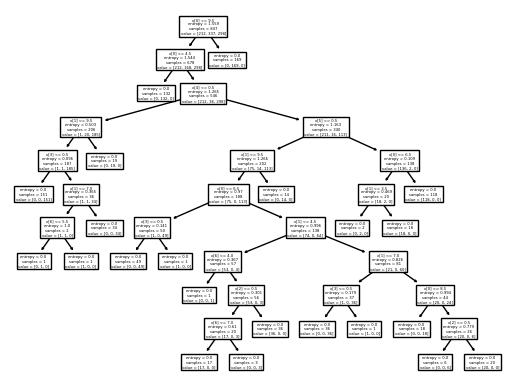

In [14]:
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10)
dt.fit(x_train, y_train)

tree.plot_tree(dt)

In [17]:
model_params = {
    'neural networks': {
        'model': MLPClassifier(),
        'params' : {
            'solver':['lbfgs', 'sgd', 'adam'],
            'max_iter': [100, 200, 300, 400, 500]
        }
    },
    'boosting' : {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [5,10,30,50,100,150,200]
        }
    },
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,2,3,5,10,20,30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'k-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
        }
    }     
}

In [18]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(pd.DataFrame(clf.cv_results_)[['params', 'mean_fit_time','std_fit_time','rank_test_score']])
    print("Best Paramters: ")
    print(clf.best_params_) 
    grid_predictions = clf.predict(x_test)
    print("Predictions Report on Test Dataset")
    print(classification_report(y_test, grid_predictions))

c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neura

                                  params  mean_fit_time  std_fit_time  \
0   {'max_iter': 100, 'solver': 'lbfgs'}       0.244401      0.034411   
1     {'max_iter': 100, 'solver': 'sgd'}       0.291286      0.011488   
2    {'max_iter': 100, 'solver': 'adam'}       0.287418      0.014789   
3   {'max_iter': 200, 'solver': 'lbfgs'}       0.395893      0.030236   
4     {'max_iter': 200, 'solver': 'sgd'}       0.534978      0.041734   
5    {'max_iter': 200, 'solver': 'adam'}       0.548661      0.007367   
6   {'max_iter': 300, 'solver': 'lbfgs'}       0.401482      0.032435   
7     {'max_iter': 300, 'solver': 'sgd'}       0.809150      0.057408   
8    {'max_iter': 300, 'solver': 'adam'}       0.795139      0.008962   
9   {'max_iter': 400, 'solver': 'lbfgs'}       0.401007      0.066168   
10    {'max_iter': 400, 'solver': 'sgd'}       0.984094      0.017746   
11   {'max_iter': 400, 'solver': 'adam'}       1.083673      0.029012   
12  {'max_iter': 500, 'solver': 'lbfgs'}       0.33